In [1]:
!conda install networkx -y

Fetching package metadata .........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/nbcommon/anaconda2_410:
#
networkx                  1.11                     py27_0  


/home/nbuser/anaconda2_410/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


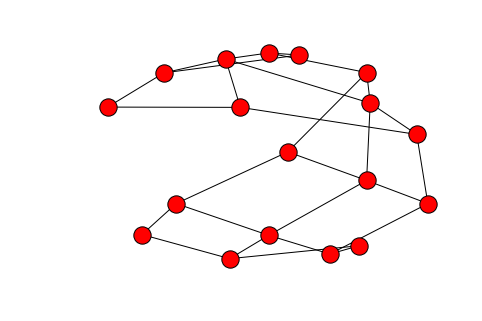

In [2]:
from operator import itemgetter
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout


def Kn(n):
    G = nx.Graph()
    a=range(n)
    G.add_nodes_from(a)
    Kn=[]
    for i in range(n-1):
        for j in range(n-i-1):
            k=j+i+1
            Kn.append((i,k))
    G.add_edges_from(Kn)
    return G

##print G.nodes()
##print G.edges()
##print G.number_of_nodes()
##print G.number_of_edges()

# Complete graph (my code)
# G = Kn(12)
# could also use
# G = nx.complete_graph(12)

# E-R is number of vertices and probability (any two vertices are joined by an edge)
# G = nx.erdos_renyi_graph(500, 0.005)
# G = nx.random_regular_graph(8, 30)

# Going for lattice stuff...
# G = nx.waxman_graph(100, 0.2)
G = nx.grid_2d_graph(3,6,periodic=False)

# This does not work on Azure as of 1/31/17
# might re-try it since I did install graphviz...
# nx.draw_graphviz(G,prog="neato",alpha=.75)

# nx.draw_circular(G, node_color='r',node_size=40,with_labels=False)
# nx.draw_random(G, node_color='r',node_size=50,with_labels=False)
# nx.draw_spectral(G, node_color='g',node_size=50,with_labels=False)
# nx.draw_shell(G, node_color='g',node_size=50,with_labels=False)
# nx.draw_planar(G, node_color='r',node_size=50,with_labels=False)
nx.draw(G)

# fig, ax = plt.subplots(figsize=(12,10))
# ax.plot(px, py)

# plt.axis('equal')
plt.show()

# plt.savefig("graph_name.png")




797 169
False
190
189
20


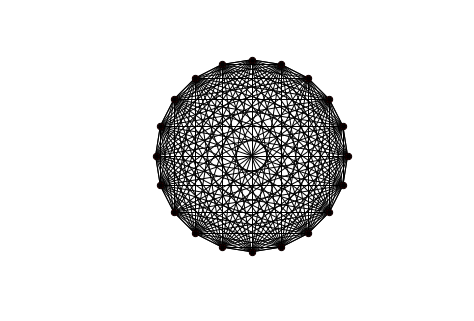

In [3]:
n = 20

from operator import itemgetter
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np
import random as r

def Kn(n):
    G = nx.Graph()
    a=range(n)
    G.add_nodes_from(a)
    Kn=[]
    for i in range(n-1):
        for j in range(n-i-1):
            k=j+i+1
            Kn.append((i,k))
    G.add_edges_from(Kn)
    return G
    
def Circular(n):
    G = nx.Graph()
    a = range(n)
    G.add_nodes_from(a)
    C = []
    for i in range(n-1):
        C.append((i,i+1))
    G.add_edges_from(C)
    G.add_edge(n-1,0)
    return(G)

##print G.nodes()
##print G.edges()
##print G.number_of_nodes()
##print G.number_of_edges()

# Complete graph (my code)
# G = Kn(12)
# could also use
# G = nx.complete_graph(12)

# E-R is number of vertices and probability (any two vertices are joined by an edge)
# G = nx.erdos_renyi_graph(40, 0.1)
# G = nx.random_regular_graph(8, 30)
G=Circular(n)
# Going for lattice stuff...
# G = nx.waxman_graph(100, 0.2)
# G = nx.grid_2d_graph(3,6,periodic=False)
# G=nx.hypercube_graph(4)
# nx.draw(G,alpha=.75)
# nx.draw(G, pos=graphviz_layout(G), node_size=1600, cmap=plt.cm.Blues, node_color=range(len(G)))
#,prog='dot')

# print nx.adjacency_matrix(G)
# print nx.laplacian_matrix(G)
# print nx.laplacian_spectrum(G)
# print nx.algebraic_connectivity(G)
# print 'Euler'
# print dir(nx)


# eCirc = nx.hamiltonian_circuit(G)
# print eCirc.next()

nx.draw_circular(G, node_color='r',node_size=40,with_labels=False)
H=G
n_attempts = 0
n_additions = 0
while not nx.is_chordal(H):
    a = r.randint(0,n-1)
    b = r.randint(0,n-1)
    n_attempts += 1
    if a != b and not H.has_edge(b, a):
        H.add_edge(a,b)
        n_additions += 1
nx.draw_circular(H, node_color='k',node_size=20)
print n_attempts, n_additions
K=nx.complete_graph(n)
print nx.is_isomorphic(H,K)
print n*(n-1)/2
print H.number_of_edges()
print H.number_of_nodes()

    


# nx.draw_random(G, node_color='r',node_size=50,with_labels=False)
# nx.draw_spectral(G, node_color='g',node_size=50,with_labels=False)
# nx.draw_shell(G, node_color='g',node_size=50,with_labels=False)


# fig, ax = plt.subplots(figsize=(12,10))
# ax.plot(px, py)

plt.axis('equal')
plt.show()

# plt.savefig("graph_name.png")




## Introduction to Euler's Formula and Platonic Solids

The purpose of this page is to describe regular polyhedra (all faces are regular polygons) in the context of Euler's formula for planar graphs.


### What is Euler's Formula for planar graphs? 

Euler is a famous mathematician. He did a lot of work, some time back. 

He started thinking about planar graphs. These are graphs that can be drawn on a flat surface 
without any of the edges between nodes (or vertices) crossing one another. Some graphs are planar; 
others are not. 

To understand Euler's formula you will need to know what graphs are. This means you need to know what
the vertices are and what the edges are. We denote these by $V$ and $E$ respectively. You will also need
to know what faces are; and the number of faces of a graph we call $F$. To learn these things we have 
built a little packet of information. At the moment it is located at 
[this website](https://robfatland.github.io/omc/mydoc_graphs_chapter_one.html).

Now after all that... are you ready???... here is Euler's formula for planar graphs: 

$$
V + F = E + 2
$$

Our first challenge is: Can you construct a planar graph that "breaks" this formula? Try a few examples.
Remember to count the "everything else" face. And also, very important, as Bradley and Meghna will tell you:
Your planar graph must be *connected*. That is, there must be a path along edges from each vertex to 
every other vertex. 

We can use set notation to say "A planar graph composed of vertices $\{ V \}$ and edges $\{ E \}$ produces a set of faces $\{ F \}$." A nice surface may be a flat sheet of paper extending off to infinity... but we will alter this
idea shortly. We are excluding -- for the moment -- a surface such as a donut or a coffee cup with a handle. 


### What are the Platonic Solids?

A platonic solid is a three-dimensional polyhedron with regular polygons for faces. (Notice that word 'faces':
You might guess that these will turn out to be... what?)

Let's take a triangle as a regular polygon. If all sides are equal the triangle is equilateral. We can 
place four of these edge-to-edge to make a four-sided figure called a tetrahedron. This is the first of 
the Platonic solids. (You can look up why they are called that; I forget at the moment. Maybe they were
invented by Plato.)

Now what about using squares? The familiar Platonic solid using squares is a cube; for example a die which
has six faces. There are three additional Platonic solids for a total of five. 

Before going further into how Euler's formula gives us candidate Platonic solids we shall take a moment
to digress into some topology, specifically bending the flat space of a piece of paper into a sphere. 
Before doing that allow me to invite you to think about it, if you have a little time. The guiding 
question is a bit complicated, as follows: 

#### Guiding question for moving planar graphs into three dimensions

Suppose you have a flat piece of paper and you draw a planar graph. You count the faces and you 
remember to include the "everything else" face around the outer perimeter of the graph. Then you
reach for a can of soda and accidentally knock your piece of paper off of your desk. It falls to the 
floor graph-side-up. 

Before you pick up your paper you are suddenly struck by this thought: Your graph is now resting on a 
much larger planar surface, the size of the earth. If you had the means you could make your graph 
larger and larger. (I am ignoring inconvenient things like buildings and oceans and just taking the earth
to be a large ball.) 

Suppose you made the graph very large, as big as a city. And then larger, as big as a country. And then
larger, as big as a hemisphere. Notice the "everything else" face of the graph becomes *smaller* 
every time you make the graph bigger. The graph itself will begin to curve around the surface of the earth
but it is still planar. 

Here is the guiding question: Suppose that your graph originally had six faces (including the
'everything else' face) and eight vertices and twelve edges. Suppose that after expanding it as
described above it came to resemble a cube drawn upon the spherical surface of the earth. 
Can you reverse the "blowing it up" process back down to a sheet of paper? And when you do that, 
when your gigantic graph is back to one sheet of paper: What does it look like? 


### Deriving the five Platonic solids


Euler's formula relates edges, faces and vertices; but I want to consider regular polyhedra in terms of ''degree'' at the vertices and ''number of sides'' to the polygon. Let these be $d$ and $n$ respectively. Here then are apparent relationships between $V$, $E$, $F$, $d$, and $n$:

From $E$ each edge separates two faces; so laying out all $F$ faces we see $F \cdot n$ edges, which (since each actual edge is counted twice) is equal to $2 \cdot E$. 

$$n\cdot F = 2\cdot E$$

or

$$F=\frac{2 \cdot E}{n}$$

Each vertex with degree $d$ produces an edge; but all told these will count the edges twice.

$$d \cdot V = 2 \cdot E$$

or 

$$V=\frac{2 \cdot E}{d}$$

Notice that there is a symmetry here; $V$ is to $d$ as $F$ is to $n$. This suggests solving for $E$ in the original formula in terms of $n$ and $d$. That is: If we substitute these expressions for $V$ and $F$ we can get a new
expression for $E$ that hinges on degree $d$ at the vertices (all the same) and the number of sides of the 
polygonal faces $n$ (all the same):

$$E = \frac{2 \cdot n \cdot d}{2 \cdot n+2 \cdot d-n \cdot d}$$

And this is a necessary condition for a Platonic solid in which the two parameters $n$ and $d$ are symmetric or interchangeable. If we find one solution for ($n$, $d$) then perhaps there is another solution with their values reversed!

One thing that I found amusing about this ''necessary'' condition (which may or not also be sufficient) is that it leads to both the classical Platonic solids (of which there are five) as well as to an unexpected additional set of results.


### Platonic Solids


First notice that while the number of edges $E$ is symmetric in $n$ and $d$, the number of resulting ''faces'' $F$ of the solid is ''not'': 

$$F=\frac{2\cdot E}{n}=\frac{4\cdot d}{2\cdot n+2\cdot d-n\cdot d}$$

How about the number of vertices $V$?

$$V=\frac{2\cdot E}{d}=\frac{4\cdot n}{2\cdot n+2\cdot d-n\cdot d}$$

Also not symmetric; so there is a bit of conjugation going on when we swap values of $n$ and $d$ though the number of edges $E$ remains the same. 

Not completed: The solution belongs here starting with $d = 3$.


### Extra solutions
 
With a sphere as our nicely behaved surface a planar graph must have identical vertices 
i.e. with the same degree $d$. We have not yet explored $d<3$ so let's just check that here.

- Let's suppose $d = 0$.  
  - Now any number of vertices $V$ is ok. We have no edges! Just a bunch of dots.
  - This is not too interesting except for the a problem of distributing vertices "evenly" on a sphere. 
    - What does ''evenly'' mean?
  - What is $n$?

- Next is $d = 1$
  - This implies paired vertices.
    - Faces? 
    - $n$?

- Next $d = 2$
  - $n = 1, 2, \cdots$? and so forth


- How about $n = 2$
  - The flip side of $d=2$



For an interesting coincidence you might look at the [Gibbs phase rule in thermodynamics](http://en.wikipedia.org/wiki/Gibbs%27_phase_rule).


### Euler's formula extended

Now that we have exhausted Platonic solids let's return to Euler's formula without this 
set of restrictions. Let's go in a different direction entirely for a bit: 

A tree has one face, $F=1$. What does this do to Euler's formula? Let's call the result the 
Euler's formula for trees. Can you prove that it is true?

If you permit multiple trees (disconnected from one another) in a graph: You have a forest. 
Suppose that a forest consists of $T$ trees: What is the resulting version of Euler's formula?

Can you produce a version of Euler's formula for a planar graph that has $T$ components? Each
component is disconnected from all of the others. 

Suppose we are permitted to work on a torus, a donut-shaped surface with a big hole through the middle.
What can you say about Euler's formula for planar graphs on this torus? 
